<a href="https://colab.research.google.com/github/saikhairnar20023/-LGMVIP--DataScience/blob/main/Stock_market_prediction_using_STACKED_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

LetsGrowMore Virtual Internship Program (January-2023)
Beginner Level Task 1

Name :- Sai shashank khairnar

Task 2 :- Stock Market Prediction and Forecasting using Stacked LSTM

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
data=pd.read_csv("https://raw.githubusercontent.com/mwitiderrick/stockprice/master/NSE-TATAGLOBAL.csv")
data.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55


In [4]:

data.tail()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
2030,2010-07-27,117.6,119.50,112.00,118.80,118.65,586100,694.98
2031,2010-07-26,120.1,121.00,117.10,117.10,117.60,658440,780.01
2032,2010-07-23,121.8,121.95,120.25,120.35,120.65,281312,340.31
2033,2010-07-22,120.3,122.00,120.25,120.75,120.90,293312,355.17
2034,2010-07-21,122.1,123.00,121.05,121.10,121.55,658666,803.56


In [5]:
df=data.reset_index()
df

,index,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55
...,...,...,...,...,...,...,...,...,...
2030,2030,2010-07-27,117.60,119.50,112.00,118.80,118.65,586100,694.98
2031,2031,2010-07-26,120.10,121.00,117.10,117.10,117.60,658440,780.01
2032,2032,2010-07-23,121.80,121.95,120.25,120.35,120.65,281312,340.31
2033,2033,2010-07-22,120.30,122.00,120.25,120.75,120.90,293312,355.17


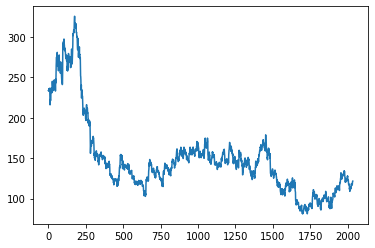

In [6]:
d_close = df['Close']
plt.plot(d_close)

In [8]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
d_close=scaler.fit_transform(np.array(d_close).reshape(-1,1))
d_close

array([[0.62418301],
       [0.62214052],
       [0.62622549],
       ...,
       [0.1621732 ],
       [0.16319444],
       [0.16584967]])

In [10]:
training_size=int(len(d_close)*0.72)
test_size=len(d_close)-training_size
train_data=d_close[0:training_size,:]
test_data=d_close[training_size:len(d_close),:1]

In [12]:
def create_dataset(dataset, time_step=1):
    x_data= []
    y_data= []
    for i in range(len(dataset)-time_step-1):
      x_data.append(dataset[i:(i+time_step), 0])
      y_data.append(dataset[i + time_step, 0])
      return np.array(x_data), np.array(y_data)

In [14]:
time_step = 100
x_train,y_train = create_dataset(train_data, time_step)
x_test, y_test= create_dataset(test_data, time_step)

In [16]:
x_train =x_train.reshape(x_train.shape[0],x_train.shape[1],1)
x_test = x_test.reshape(x_test.shape[0],x_test.shape[1],1)

In [18]:
x_train.shape

(1, 100, 1)

In [20]:
y_train.shape

(1,)

In [21]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [23]:
regressor=Sequential()

regressor.add(LSTM(units=50,return_sequences=True,input_shape=(100,1)))

regressor.add(LSTM(units=50,return_sequences=True))

regressor.add(LSTM(units=50))

regressor.add(Dense(1))
     

In [24]:
regressor.compile(loss='mean_squared_error',optimizer='adam')
regressor.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
1/1 [==============================] - 8s 8s/step - loss: 0.8302 - val_loss: 0.0053
Epoch 2/100
1/1 [==============================] - 0s 172ms/step - loss: 0.6771 - val_loss: 0.0017
Epoch 3/100
1/1 [==============================] - 0s 124ms/step - loss: 0.5336 - val_loss: 1.3986e-05
Epoch 4/100
1/1 [==============================] - 0s 125ms/step - loss: 0.3890 - val_loss: 0.0017
Epoch 5/100
1/1 [==============================] - 0s 141ms/step - loss: 0.2436 - val_loss: 0.0097
Epoch 6/100
1/1 [==============================] - 0s 131ms/step - loss: 0.1086 - val_loss: 0.0298
Epoch 7/100
1/1 [==============================] - 0s 125ms/step - loss: 0.0148 - val_loss: 0.0707
Epoch 8/100
1/1 [==============================] - 0s 147ms/step - loss: 0.0158 - val_loss: 0.1206
Epoch 9/100
1/1 [==============================] - 0s 124ms/step - loss: 0.0959 - val_loss: 0.1394
Epoch 10/100
1/1 [==============================] - 0s 131ms/step - loss: 0.1161 - val_loss: 0.1289
Epoch 11

In [25]:
train_predict=regressor.predict(x_train)
test_predict=regressor.predict(x_test)
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)
     

1/1 [==============================] - 0s 28ms/step


In [27]:
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train ,train_predict))

0.0026150548380183825

In [29]:
math.sqrt(mean_squared_error(y_test,test_predict))

0.3236519785877926

In [31]:
look_back = 100
train_predict_plot = np.empty_like(d_close)
train_predict_plot[:, :] = np.nan
train_predict_plot[look_back:len(train_predict)+look_back, :] = train_predict

In [32]:
test_predict_plot = np.empty_like(d_close)
test_predict_plot[:, :] = np.nan
test_predict_plot[len(train_predict)+(look_back*2)+1:len(d_close)-1, :] = test_predict

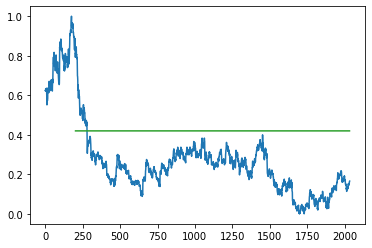

In [34]:
plt.plot(scaler.inverse_transform(d_close))
plt.plot(train_predict_plot)
plt.plot(test_predict_plot)
plt.show()

In [36]:
len(test_data), x_test.shape

(570, (1, 100, 1))

In [37]:
x_input = test_data[470:].reshape(1,-1)
x_input.shape
     

(1, 100)

In [39]:
tem_input = list(x_input)
tem_input = tem_input[0].tolist()

In [ ]:
lt_output=[]
n_steps=100
next_No_Of_Days = 50
i=0

while(i100):
           x_input=np.array(tem_input[1:])
           print("{} day input {}".format(i,x_input))
           x_input=x_input.reshape(1,-1)
           x_input = x_input.reshape((1, n_steps, 1))
           yt = regressor.predict(x_input, verbose=0)
           print("{} day output {}".format(i,yt))
           tem_input.extend(yt[0].tolist())
           tem_input=tem_input[1:]
           lt_output.extend(yt.tolist())
           i=i+1
        else:
           x_input = x_input.reshape((1, n_steps,1))
           yt = regressor.predict(x_input, verbose=0)
           print(yt[0])
           tem_input.extend(yt[0].tolist())
           print(len(tem_input))
           lt_output.extend(yt.tolist())
           i=i+1
    
print(lt_output)

In [ ]:
df = d_close.tolist()
df.extend(lt_output)
df=scaler.inverse_transform(df).tolist()
plt.plot(df)